In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [58]:
df = sns.load_dataset("titanic")

In [59]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [60]:
df[["sex","class","embark_town"]].isna().sum()

sex            0
class          0
embark_town    2
dtype: int64

In [61]:
df = df.dropna(subset=["embark_town"])

In [62]:
df[["sex","class","embark_town"]].isna().sum()

sex            0
class          0
embark_town    0
dtype: int64

In [63]:
# one-hot encoding

In [64]:
df["sex"].value_counts()

sex
male      577
female    312
Name: count, dtype: int64

In [65]:
df["embark_town"].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [66]:
df["class"].value_counts()

class
Third     491
First     214
Second    184
Name: count, dtype: int64

In [67]:
df_onehot = pd.get_dummies(df, columns=["sex", "embark_town"], drop_first=True)

In [68]:
df_onehot

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,no,False,True,False,True
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,yes,False,False,False,False
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,yes,True,False,False,True
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,yes,False,False,False,True
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,no,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,Second,man,True,NaN,no,True,True,False,True
887,1,1,19.0,0,0,30.0000,S,First,woman,False,B,yes,True,False,False,True
888,0,3,NaN,1,2,23.4500,S,Third,woman,False,NaN,no,False,False,False,True
889,1,1,26.0,0,0,30.0000,C,First,man,True,C,yes,True,True,False,False


In [69]:
df_onehot.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'class', 'who', 'adult_male', 'deck', 'alive', 'alone', 'sex_male',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [70]:
# label encoder

In [71]:
label_encoder = LabelEncoder()

In [72]:
df_label = df.copy()

In [73]:
df_label["sex"] = label_encoder.fit_transform(df_label["sex"])

In [74]:
df_label

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [75]:
# ordinal encoder

In [76]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [77]:
df_ordinal = df.copy()

In [78]:
class_order = ["Third","Second","First"]

In [79]:
ordinal_encoder = OrdinalEncoder(categories=[class_order])

In [80]:
df_ordinal["class"] = ordinal_encoder.fit_transform(df_ordinal[["class"]])

In [81]:
df_ordinal

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,0.0,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,2.0,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,0.0,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,2.0,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,0.0,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1.0,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,2.0,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,0.0,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,2.0,man,True,C,Cherbourg,yes,True


In [82]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: title={'center': 'One Hot Encoder '}, xlabel='sex_male'>

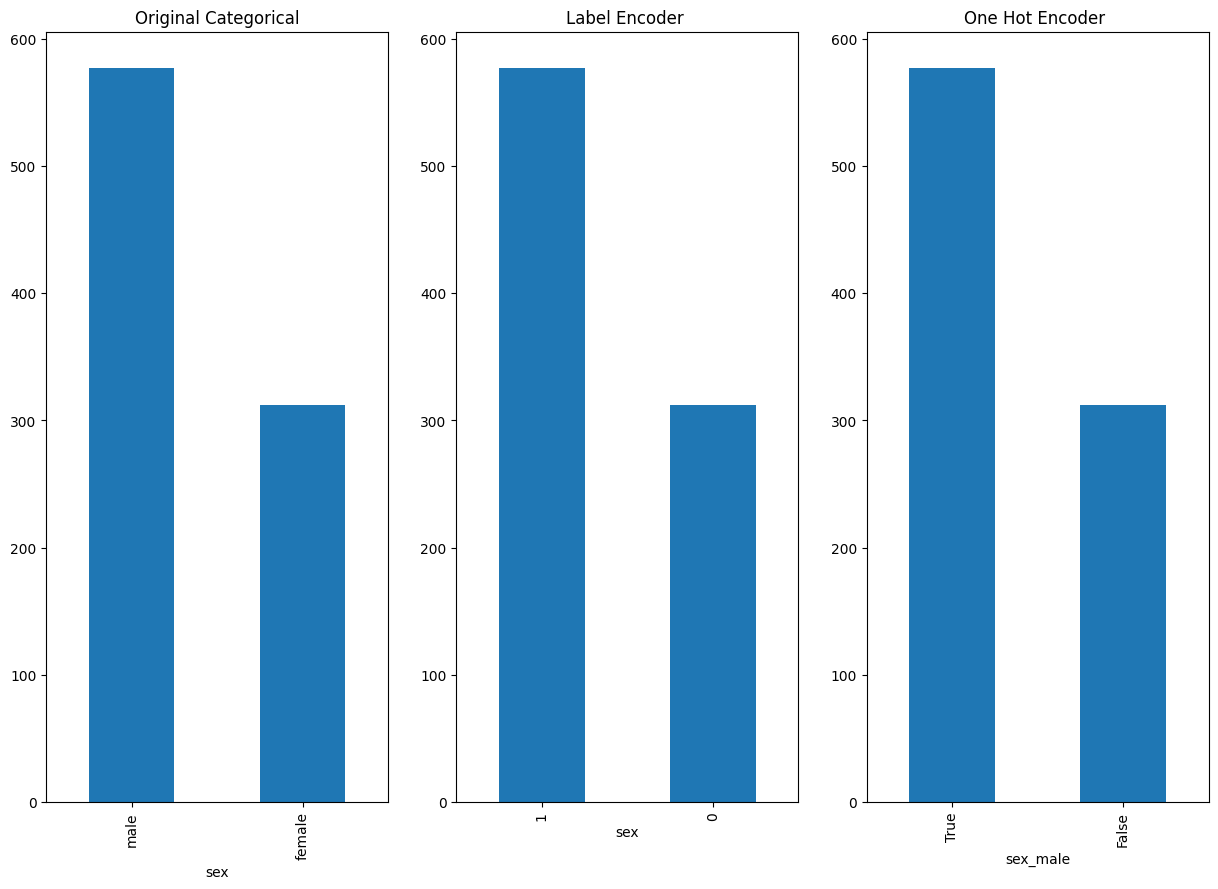

In [85]:
fig, axes = plt.subplots(1,3,figsize=(15,10))
df["sex"].value_counts().plot(kind="bar", ax=axes[0], title="Original Categorical")
df_label["sex"].value_counts().plot(kind="bar", ax=axes[1], title="Label Encoder ")
df_onehot["sex_male"].value_counts().plot(kind="bar", ax=axes[2], title="One Hot Encoder ")